In [3]:
#mapping some polygons - 
import pandas as pd
import geopandas as gpd
from shapely.geometry.polygon import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import cm
import folium
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'cartopy'

In [ ]:
#USE ONCE
# Lat = np.linspace(36.01,40.01,200)
# Lon = np.linspace(-84.01, -75.01,200)
# vapoly = {'Lat':Lat,'Lon':Lon}
# vapolydf = pd.DataFrame(vapoly)
# vapolydf.head()
# vapolydf.to_csv(r'vapoly.csv')

In [4]:
#dataframes for csv files - Buffers
dfbuffer = pd.read_csv('bufferlatlongV2.csv', delimiter = ',').astype(float)
dfhurdat = pd.read_csv('hurdatcleanva.csv', delimiter = ',')
dfcoast = pd.read_csv('coastlatlongV2.csv', delimiter = ',').astype(float)
dfbasin = pd.read_csv('jamesbasinlatlongV2.csv', delimiter = ',').astype(float)
dfva = pd.read_csv('vapoly.csv',delimiter = ',').astype(float)


In [ ]:
dfva.head()

In [14]:
dfhurdat.head()

,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Maxspeed
0,AL041851,UNNAMED,TS,36.8,-75.1,1851-08-25 18:00:00,40.0
1,AL031854,UNNAMED,TS,36.8,-75.9,1854-09-10 06:00:00,40.0
2,AL031856,UNNAMED,TS,37.0,-76.0,1856-08-20 00:00:00,50.0
3,AL031856,UNNAMED,TS,38.0,-75.3,1856-08-20 06:00:00,50.0
4,AL021857,UNNAMED,TS,36.3,-75.8,1857-09-14 06:00:00,50.0


In [15]:
import scipy as sp
import scipy.interpolate

In [16]:
#for storm in dfhurdat['Storm Number'].unique():
lat = dfhurdat[['Lat']].copy()
latdf = pd.DataFrame(lat)
lon = dfhurdat[['Lon']].copy()
londf = pd.DataFrame(lat)
latmin = min(latdf['Lat'])  
latmax = max(latdf['Lat'])
lonmin = min(londf['Lat'])  
lonmax = max(londf['Lat'])
len(londf)
  

    

290

In [17]:
length = 200
newlon = np.linspace(lonmin, lonmax, length)
newlat = sp.interpolate.interp1d(londf, latdf, kind='cubic')(newlon)
print(newlat) 

ValueError: x and y arrays must be equal in length along interpolation axis.

In [26]:
#create the polygons
#polygon to reach beyond state a little
#listPoint = [[13.415449261665342, 52.502674590782519],[13.416039347648621, 52.50250152147968],[13.415787220001221, 52.501845158120446],[13.416162729263306, 52.502201097675766],[13.415406346321104, 52.502334982450677],[13.415111303329468,52.50204435400651]]
#polygon = {'type': 'Polygon', 'coordinates': [listPoint]}

buffer_geom =Polygon(zip(dfbuffer['Lon'],dfbuffer['Lat']))
basin_geom = Polygon(zip(dfbasin['Lon'],dfbasin['Lat']))
crs = {'init' : 'epsg:4326'}
bufferpoly = gpd.GeoDataFrame(index = [0], crs = crs, geometry = [buffer_geom])
bufferpoly.to_file(filename = 'buffer.geojson', driver = 'GeoJSON')
basinpoly = gpd.GeoDataFrame(index = [0], crs = crs, geometry = [basin_geom])
basinpoly.to_file(filename = 'basin.geojson', driver = 'GeoJSON')

/home/pchilton/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [29]:
basinpoly
bufferpoly

,geometry
0,"POLYGON ((-75.40000 37.30000, -75.30000 37.300..."


In [19]:
### for use with original data from nhc ###
# import pandas as pd
# from datetime import datetime
# def lat_lon_to_float (v):
#     """Convert strings from NHC to float locations"""
#     if (v[-1] == 'S') or (v[-1] == 'W'):
#         multiplier = -1
#     else:
#         multiplier = 1
#     return float(v[:-1])*multiplier

In [20]:
### for use with original data from nhc ###
# hurdata = []
# with open ('hurdat2.txt', 'r') as f:
#     for line in f.readlines():
#         if line.startswith('AL'):
#             storm_id = line.split(',')
#             storm_number = storm_id[0].strip()
#             storm_name = storm_id[1].strip()
#         else:
#             location_line = line.split(',')
#             dt = datetime.strptime(location_line[0] + location_line[1],"%Y%m%d %H%M")
#             storm_status = location_line[3].strip()
#             storm_lat = lat_lon_to_float(location_line[4].strip())
#             storm_lon = lat_lon_to_float(location_line[5].strip())
#             max_speed = float(location_line[6].strip())
#             hurdata.append([storm_number,storm_name,storm_status,storm_lat,storm_lon,dt,max_speed])
#df = pd.DataFrame(hurdata, columns = ['Storm Number','Storm Name', 'Storm Status', 'Lat', 'Lon','Time', 'Max Speed'])


In [21]:
dfhurdat.head()


,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Maxspeed
0,AL041851,UNNAMED,TS,36.8,-75.1,1851-08-25 18:00:00,40.0
1,AL031854,UNNAMED,TS,36.8,-75.9,1854-09-10 06:00:00,40.0
2,AL031856,UNNAMED,TS,37.0,-76.0,1856-08-20 00:00:00,50.0
3,AL031856,UNNAMED,TS,38.0,-75.3,1856-08-20 06:00:00,50.0
4,AL021857,UNNAMED,TS,36.3,-75.8,1857-09-14 06:00:00,50.0


In [22]:
from sympy import Point, Polygon
import pandas as pd
import geopandas as gpd
from shapely.geometry import *
# # #changing to a GeoDataFrame to create geometry series
# hurdatgdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon,df.Lat))
# # hurdatgdf.head()
# # len(hurdatgdf)
# T = pd.merge(dfbuffer, dfhurdat, how='inner', on=['Lat', 'Lon'])
# print(T)
# len(T)
# T
dfinbuffer = pd.merge(dfhurdat,dfva,on=['Lat','Lon'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(dfinbuffer)
len(dfinbuffer)
print(dfinbuffer)

Empty DataFrame
Columns: [Storm Number, Storm Name, Storm Status, Lat, Lon, Time, Maxspeed]
Index: []


In [23]:
# total map with all storms and buffers
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [24]:
plot_crs = ccrs.LambertConformal(central_longitude =-100., central_latitude = 45)
data_crs = ccrs.PlateCarree()

/home/pchilton/anaconda3/lib/python3.8/site-packages/cartopy/mpl/feature_artist.py:213: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  c = matplotlib.collections.PathCollection(paths,


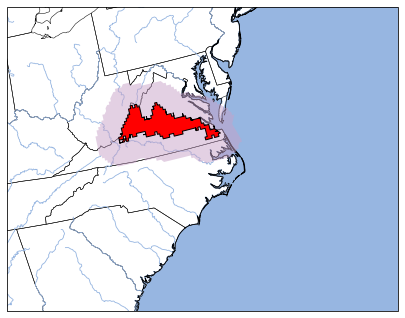

In [25]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def basincoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    basinlon = dfbasin['Lon']
    basinlat = dfbasin['Lat']

    return basinlon, basinlat

def buffercoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    bufferlon = dfbuffer['Lon']
    bufferlat = dfbuffer['Lat']
    

    return bufferlon, bufferlat
bufferlon, bufferlat = buffercoords()
basinlon, basinlat = basincoords()

#ax.set_title('James River Basin and Buffer - Virginia, USA')

# turn the lons and lats into a shapely LineString
buffer = sgeom.LineString(zip(bufferlon, bufferlat))
basin = sgeom.LineString(zip(basinlon, basinlat))


fig = plt.figure(figsize = (7,7))
ax = plt.subplot(1,1,1,projection = plot_crs)

ax.set_extent([-85,-70,32,40],data_crs)
ax.coastlines('50m', edgecolor = 'k', linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)
ax.add_feature(cfeature.RIVERS, linewidth = 0.85)
ax.add_feature(cfeature.OCEAN)
ax.add_geometries([buffer], ccrs.PlateCarree(),facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([basin], ccrs.PlateCarree(),facecolor='rgb', edgecolor='k')



#for storm_number in vahurc['Storm Number'].unique():
    #data = df[jameshurc['Storm Number'] == storm_number]
    #print(vahurc)
ax.plot(dfinbuffer['Lon'], dfinbuffer['Lat'],transform = data_crs)#,dfbuffer['Lon'],dfbuffer['Lat'],dfbasin['Lat'],dfbasin['Lon'], transform = data_crs)

In [30]:
import geopandas

In [65]:
datachop1 = dfhurdat[['Lat']].copy().values
df1 = pd.DataFrame(datachop1)
datachop2 = dfhurdat[['Lon']].copy().values
df2 = pd.DataFrame(datachop2)
#dfhd = pd.DataFrame(datachop).astype(float)
#dfhd.columns = ['coordinates']
dfhd['coordinates']= df1['Lat'] + df2['Lon']
#dfhd['coordinates']= dfhd['Lat'].join(dfhd['Lon'])
# dfhd.values.tolist()
dfhd['coordinates']

KeyError: 'Lat'

In [39]:
dfhurdat2 = geopandas.GeoDataFrame(dfhurdat, geometry = ('lat','lon'))

TypeError: not all arguments converted during string formatting

In [37]:
dfhurdat2.to_file('HurdatData.shp', driver = 'ESRI Shapefile')

AttributeError: No geometry data set yet (expected in column 'geometry'.)